In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('Thermoacoustic_features_512.csv')

In [28]:
data['Status'] = pd.Categorical(data['Status'])

In [29]:
train, test = train_test_split(data, test_size = None, shuffle = True,
                                                    random_state = 324)

In [30]:
train

,RMS,Skewness,Kurtosis,Peak-to-Peak,Crest,Status
476,1298.002932,0.189431,-1.277342,4435.173805,1.826249,transition
447,1412.742226,-0.086667,-1.545248,4697.548726,1.559359,transition
131,199.670801,-0.263528,-0.412251,1016.888112,2.525184,stable
10,19.856043,-0.160854,-0.230281,90.422995,1.727552,stable
366,1104.680000,0.186958,-1.303548,3726.613284,1.866739,transition
...,...,...,...,...,...,...
546,1994.475318,0.078966,-1.525908,6846.947795,1.693915,unstable
35,13.868035,-0.037306,0.668884,81.528930,3.221708,stable
296,714.980071,0.028688,-1.211346,2751.230809,2.015507,transition
272,111.831503,0.092750,-0.181585,517.338121,2.758937,stable


In [31]:
scaler = StandardScaler()
train_scaled= scaler.fit_transform(train.iloc[:,:-1])
test_scaled = (test.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

In [32]:
logistic_clf = LogisticRegression(C = 100, max_iter = 500, n_jobs = -1)

In [33]:
logistic_clf.fit(train_scaled, train['Status'])


LogisticRegression(C=100, max_iter=500, n_jobs=-1)

In [34]:
train_predictions = logistic_clf.predict(train_scaled)
test_predictions = logistic_clf.predict(test_scaled)

## Confusion Matrices

In [35]:
train_confusion_matrix = confusion_matrix(train['Status'], train_predictions)
test_confusion_matrix = confusion_matrix(test['Status'], test_predictions)


### Acuracy Calculation

In [36]:
train_accuracy = accuracy_score(train['Status'], train_predictions)
print("Ovearll training accuracy: ", train_accuracy)

Ovearll training accuracy:  1.0


In [37]:

test_accuracy = accuracy_score(test['Status'], test_predictions)
print("Ovearll testing accuracy: ", test_accuracy)

Ovearll testing accuracy:  1.0


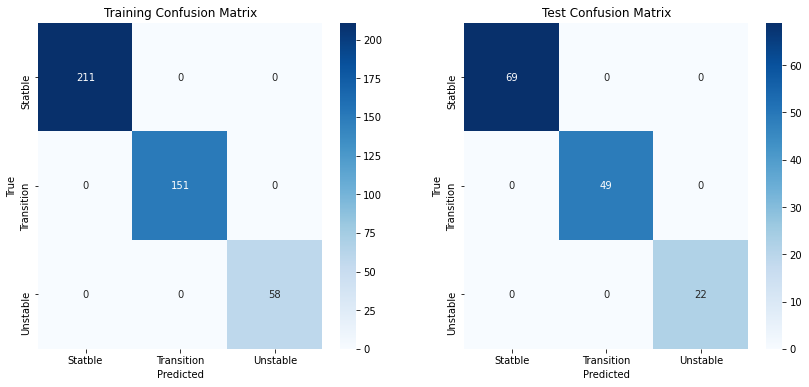

In [38]:

status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion_matrix, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confusion_matrix, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_logistic.jpg', dpi = 400)
plt.show()

## Training decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier


In [40]:
dt = DecisionTreeClassifier(max_depth=4)

In [41]:
dt.fit(train_scaled, train['Status'])

DecisionTreeClassifier(max_depth=4)

In [42]:
train_predict = dt.predict(train_scaled)
test_predict = dt.predict(test_scaled)

In [43]:
train_confusion = confusion_matrix(train['Status'], train_predict)
test_confusion = confusion_matrix(test['Status'], test_predict)


In [44]:
train_accu = accuracy_score(train['Status'], train_predict)
print("Ovearll training accuracy: ", train_accu)

test_accu = accuracy_score(test['Status'], test_predict)
print("Ovearll testing accuracy: ", test_accu)

Ovearll training accuracy:  1.0
Ovearll testing accuracy:  1.0


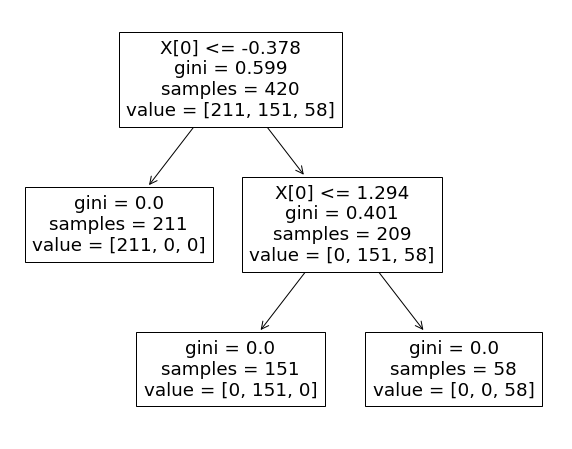

In [45]:
from sklearn import tree
plt.figure(figsize = (10,8))
tree.plot_tree(dt) 
plt.savefig('dt.jpg', dpi = 400)

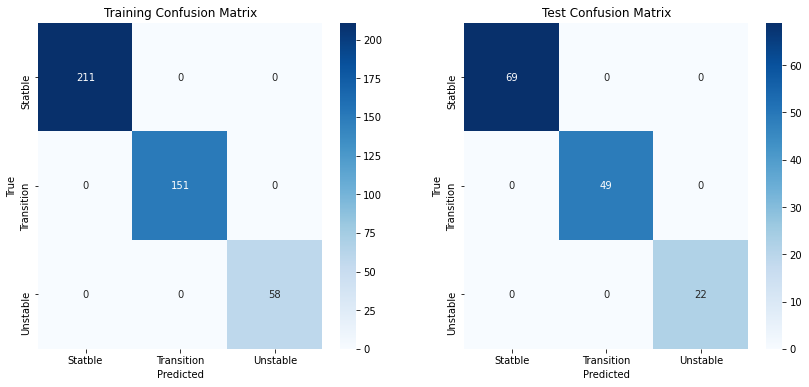

In [46]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confusion, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_DecisionTree.jpg', dpi = 400)
plt.show()

## SVM

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [48]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [49]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)


In [50]:
tuned_svm_clf.fit(train_scaled, train['Status'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [51]:
tuned_svm_clf.best_score_

1.0

In [52]:
tuned_svm_clf.best_params_

{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}

In [53]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=1, gamma=0.05)

In [54]:
train_predictions_svm = best_clf.predict(train_scaled)
test_predictions_svm = best_clf.predict(test_scaled)

In [55]:
train_confu_matrix_svm = confusion_matrix(train['Status'], train_predictions_svm)
test_confu_matrix_svm = confusion_matrix(test['Status'], test_predictions_svm)

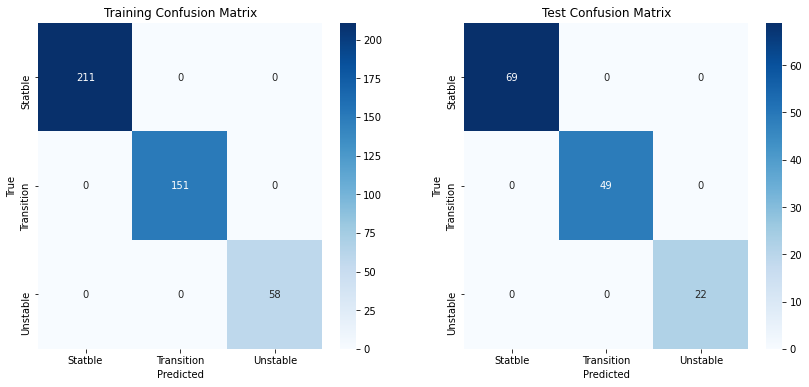

In [56]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confu_matrix_svm, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confu_matrix_svm, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_svm.jpg', dpi = 400)
plt.show()